# Neural Nets finally!

# STFU I want to try things out!
Ok if you are a more visual person and you want to try things NOW you can head to https://playground.tensorflow.org and see things in action. The TensorFlow Playground is an interactive web application that allows users to experiment with different configurations of artificial neural networks. It provides a simple and intuitive interface that lets users create, train, and visualize neural networks in real-time.

The Playground is designed to be accessible to users without a deep understanding of machine learning concepts, making it a great tool for beginners who want to experiment with neural networks. The interface allows users to select the type of problem they want to solve, such as a regression or classification problem, and adjust various parameters of the neural network, such as the number of hidden layers and the learning rate.

As the user makes changes to the network, the Playground provides real-time visual feedback of the network's performance. This allows users to quickly see the effects of their changes and adjust the network accordingly. The Playground also provides various visualization tools, such as activation and weight histograms, that help users gain a deeper understanding of how the network is making its predictions.

Overall, the TensorFlow Playground is a powerful and intuitive tool for experimenting with neural networks, and it is widely used by beginners and experts alike for exploring the capabilities and limitations of neural networks.

# What is the math like?

Ok there veeeery basics of it are this:

A neural network is a collection of connected nodes (or "neurons") that work together to perform a specific task. Each neuron takes one or more inputs, performs a mathematical operation on those inputs, and produces an output. The output of one neuron can then be used as input to another neuron, creating a chain of interconnected neurons that can perform complex computations.

The basic mathematical operation performed by each neuron is a weighted sum of its inputs, followed by an activation function. The weighted sum is calculated by multiplying each input by a corresponding weight and summing the results. The activation function is then applied to the weighted sum to produce the neuron's output.

The weight of each input is a parameter of the neuron that is learned during the training process. The goal of training is to adjust the weights so that the network can accurately predict the desired output for a given input.

Here are some formulas that describe the basic math of a single neuron in a neural network:

-   Weighted sum: z = w1*x1 + w2*x2 + ... + wn*xn + b
    -   z is the weighted sum of the inputs
    -   x1 to xn are the inputs to the neuron
    -   w1 to wn are the weights associated with each input
    -   b is a bias term that is added to the weighted sum

    Activation function: a = f(z)
    -   a is the output of the neuron
    -   f() is the activation function, which applies a non-linear transformation to the weighted sum z

There are many different types of activation functions that can be used in neural networks, such as the sigmoid function, ReLU (rectified linear unit) function, and softmax function, among others.

Overall, the basic math of neural networks involves performing a weighted sum of inputs, followed by an activation function, to produce an output. By adjusting the weights and biases of the neurons during the training process, the network can learn to accurately predict the desired output for a given input.

The weighted sum of inputs in a single neuron can be expressed as a dot product between the input vector and the weight vector, followed by the addition of the bias term.

Mathematically, this can be represented as:

$$z = Wx + b$$

where x is the input vector, W is the weight matrix, and b is the bias vector. W is a matrix that stores the weights for each input, with each row representing the weights for a single neuron. x and b are vectors of the same size, and the dot product and addition are performed element-wise.

To compute the output of the neuron, an activation function is applied to the weighted sum. The most commonly used activation function is the ReLU function, which applies the rectified linear transformation:

$$a = max(0, z)$$

where a is the output of the neuron.

In a neural network, the dot product and addition operations are performed repeatedly at each layer, with the output of one layer becoming the input to the next layer. This can be represented as a sequence of matrix multiplications and vector additions.

In particular, the output of a layer can be computed as:

$$z = Wx + b$$
$$a = f(z)$$

where x is the input vector, W is the weight matrix, b is the bias vector, and f() is the activation function. This can be rewritten as:

$$a = f(Wx + b)$$

The process of training a neural network involves adjusting the weights and biases of each neuron so that the network can accurately predict the desired output for a given input. This is typically done using a form of gradient descent, which involves computing the gradient of the loss function with respect to the weights and biases, and updating them in the direction of the negative gradient.

In summary, the basic math of neural networks involves performing a series of matrix multiplications and vector additions, followed by the application of an activation function. By adjusting the weights and biases of the neurons during the training process, the network can learn to accurately predict the desired output for a given input.

Ok the super from scratch implementation (hardcoded everything) implementation in pytorch would be this:

In this example, we define an input tensor x with three elements, a weight tensor w with three elements, and a bias tensor b with one element. We then perform the weighted sum of the inputs and the weights, and add the bias term. We apply the sigmoid activation function to the result, and print the output.

Note that PyTorch provides many built-in activation functions, including ReLU, sigmoid, and tanh. You can use any of these functions by simply calling them on the weighted sum z.

This example demonstrates the basic math of a single neuron, and how it can be implemented in PyTorch. In a real neural network, there would be many such neurons connected in a network, and the weights and biases of each neuron would be adjusted during the training process to optimize the network's performance.

In [1]:
import torch

# Define the input tensor
x = torch.tensor([1.0, 2.0, 3.0])

# Define the weight tensor and bias tensor
w = torch.tensor([0.5, -0.5, 0.3])
b = torch.tensor([0.1])

# Perform the weighted sum
z = torch.dot(x, w) + b

# Apply the activation function (sigmoid)
a = torch.sigmoid(z)

# Print the output
print(a)


tensor([0.6225])


# How does the anatomy of a Neural net look like in pytorch?

Let's spell it out in code ...

```python
# Define the neural network architecture
class NeuralNet(nn.Module):
    # Constructor to define the layers and activation function
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  # Input layer
        self.activation1 = nn.ReLU()  # Activation function
        self.layer2 = nn.Linear(hidden_size, output_size)  # Output layer

    # Define the forward pass through the layers and activation function
    def forward(self, input_data):
        out = self.layer1(input_data)  # Pass data through input layer
        out = self.activation1(out)  # Apply activation function
        out = self.layer2(out)  # Pass data through output layer
        return out

# Instantiate the neural network object
neural_net = NeuralNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.SGD(neural_net.parameters(), lr=learning_rate)  # Optimizer

# Train the neural network
for epoch in range(num_epochs):
    # Loop through the data batches
    for inputs, labels in train_loader:
        # Zero the gradients for each batch
        optimizer.zero_grad()

        # Forward pass: pass data through the network and compute loss
        outputs = neural_net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass: compute gradients of loss with respect to the network parameters
        '''
        In a PyTorch neural network, we compute gradients of the loss with respect to the network parameters using a process called backpropagation. Backpropagation is a fundamental part of training neural networks, and it allows the network to adjust its parameters to improve its performance.

        To understand why we need to compute gradients of the loss, it's helpful to think about how the neural network learns. During training, we provide the network with input data and corresponding target outputs. The network then makes a prediction based on the input data, and we compare the prediction to the target output to compute the loss (or error).

        The goal of training is to adjust the parameters of the network so that it produces more accurate predictions. We do this by minimizing the loss using an optimization algorithm like stochastic gradient descent (SGD). The optimization algorithm works by adjusting the parameters of the network in the direction that reduces the loss the most.

        To determine the direction in which to adjust the parameters, we need to compute the gradient of the loss with respect to each parameter. The gradient tells us the direction of the steepest increase in the loss, so we want to move in the opposite direction to reduce the loss. By computing the gradient of the loss with respect to each parameter, we can determine how to adjust the parameters to reduce the loss.

        In summary, we compute gradients of the loss in a PyTorch neural network to determine the direction in which to adjust the network parameters during training. By adjusting the parameters in the direction that reduces the loss the most, we can improve the accuracy of the network's predictions.
        '''
        loss.backward()

        # Update the network parameters using the gradients and the optimizer
        optimizer.step()

```

# A closer look on stochastic gradient descent

try to run the code below that tries to show how SGD works ... explanation below

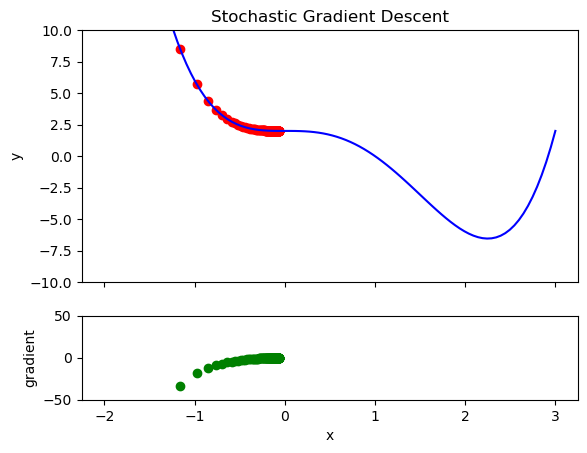

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    return x**4 - 3*x**3 + 2

# Define the gradient of the objective function
def gradient_function(x):
    return 4*x**3 - 9*x**2

# Set the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 150

# Initialize the starting point
x = -1.5

# Initialize the plot
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax1.set_ylim(-10, 10)
ax2.set_ylim(-50, 50)
ax2.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_ylabel('gradient')
ax1.set_title('Stochastic Gradient Descent')

# Plot the objective function
x_vals = np.linspace(-2, 3, 100)
y_vals = objective_function(x_vals)
ax1.plot(x_vals, y_vals, color='blue')

# Initialize the SGD path and gradient plot
for epoch in range(num_epochs):
    # Perform SGD for one step
    gradient = gradient_function(x)
    x -= learning_rate * gradient
    y = objective_function(x)

    # Plot the point on the SGD path
    ax1.scatter(x, y, color='red')

    # Plot the gradient
    ax2.scatter(x, gradient, color='green')

plt.show()


This is a great example as it shows the problem with local minima ... we need to somehow be nudged away from them one way to do this is with the NAdam optimizer which is commonly used. Here is a small implementation of that ...

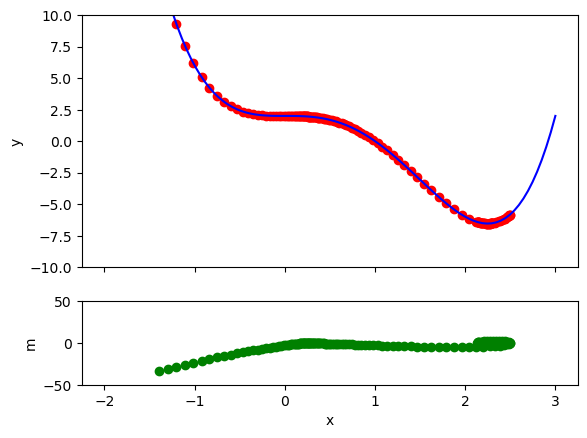

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    return x**4 - 3*x**3 + 2

# Define the gradient of the objective function
def gradient_function(x):
    return 4*x**3 - 9*x**2

# Set the learning rate and number of epochs
learning_rate = 0.1
num_epochs = 150

# Initialize the starting point
x = -1.5

# Initialize the momentum and RMSprop parameters
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
m = 0
v = 0

# Initialize the plot
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax1.set_ylim(-10, 10)
ax2.set_ylim(-50, 50)
ax2.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_ylabel('m')

# Plot the objective function
x_vals = np.linspace(-2, 3, 100)
y_vals = objective_function(x_vals)
ax1.plot(x_vals, y_vals, color='blue')

# Initialize the ADAM path and momentum plot
for epoch in range(num_epochs):
    # Compute the gradient
    gradient = gradient_function(x)

    # Update the momentum and RMSprop parameters
    m = beta1 * m + (1 - beta1) * gradient
    v = beta2 * v + (1 - beta2) * (gradient**2)

    # Compute the bias-corrected estimates
    m_hat = m / (1 - beta1**(epoch+1))
    v_hat = v / (1 - beta2**(epoch+1))

    # Update the point using the ADAM optimizer
    x -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    y = objective_function(x)

    # Plot the point on the ADAM path
    ax1.scatter(x, y, color='red')

    # Plot the momentum parameter
    ax2.scatter(x, m_hat, color='green')

plt.show()

We did some regression before so let's do some regression using neural nets!

Epoch [100/1000], Loss: 0.6089
Epoch [200/1000], Loss: 0.5365
Epoch [300/1000], Loss: 0.5097
Epoch [400/1000], Loss: 0.4998
Epoch [500/1000], Loss: 0.4961
Epoch [600/1000], Loss: 0.4947
Epoch [700/1000], Loss: 0.4942
Epoch [800/1000], Loss: 0.4940
Epoch [900/1000], Loss: 0.4939
Epoch [1000/1000], Loss: 0.4939


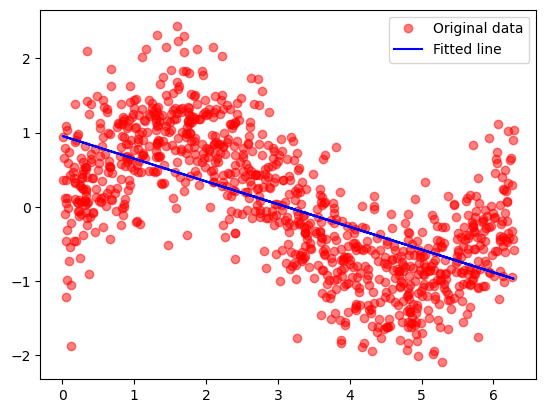

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the data
x = np.random.rand(1000, 1) * 2 * np.pi
y = np.sin(x) + np.random.randn(1000, 1) * 0.5

# Convert data to PyTorch tensors
x = torch.tensor(x, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

# Define the model
class RegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

# Initialize the model
model = RegressionModel(1, 1)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Evaluate the model
predicted = model(x).detach().numpy()
plt.plot(x.numpy(), y.numpy(), 'ro', alpha=0.5, label='Original data')
plt.plot(x.numpy(), predicted, 'b', label='Fitted line')
plt.legend()
plt.show()

Ok this performs linear regression to a nonlinear input just to show you the basics of pytorch so let's improve things:

Epoch [100/1000], Loss: 0.2288
Epoch [200/1000], Loss: 0.1003
Epoch [300/1000], Loss: 0.0591
Epoch [400/1000], Loss: 0.0465
Epoch [500/1000], Loss: 0.0428
Epoch [600/1000], Loss: 0.0418
Epoch [700/1000], Loss: 0.0415
Epoch [800/1000], Loss: 0.0414
Epoch [900/1000], Loss: 0.0413
Epoch [1000/1000], Loss: 0.0413


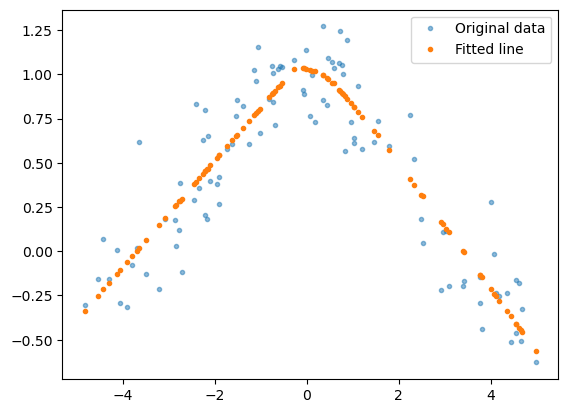

In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the data
x = np.random.rand(100, 1) * 10 - 5
y = np.sin(x) / x + np.random.randn(100, 1) * 0.2

# Convert data to PyTorch tensors
x = torch.tensor(x, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

# Define the model
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

# Initialize the model
model = RegressionModel(1, 10, 1)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Evaluate the model
predicted = model(x).detach().numpy()
plt.plot(x.numpy(), y.numpy(),'.', alpha=0.5, label='Original data')
plt.plot(x.numpy(), predicted,'.', label='Fitted line')
plt.legend()
plt.show()


# Variational autoencoders ... the hello world of neural nets

Ok neural nets offer some great complexity and contrary to the example we had before we now need to focus on the architecture of our model. One cool thing are variational autoencoders as the offer to do a dimensionality reduction into an embedding space. This embedded space is hidden (latin: latent)  and the great thing is that the latent space of our embeddings is continous and differentiatable. A lot of things that sound strange so let's check this out with an example. We will first use the MNIST dataset (hand written digits) and then use our molecule dataset to generate some cool new molecules!

# Background on VAEs

A variational autoencoder (VAE) is a type of generative model that combines a neural network architecture with probabilistic modeling. The goal of a VAE is to learn a low-dimensional representation (latent variable) of high-dimensional data, such as images or text, in an unsupervised manner.

The architecture of a VAE consists of two main components: an encoder network and a decoder network. The encoder network takes as input a high-dimensional data point and maps it to a lower-dimensional latent space, where each dimension represents a learned feature. The decoder network takes as input a point in the latent space and generates a high-dimensional output that is similar to the input.

In a VAE, the encoder network learns to map the input data to a probability distribution in the latent space. Specifically, the encoder outputs the mean and standard deviation of a normal distribution over the latent space, conditioned on the input data. The decoder network then takes a sample from this distribution and uses it to generate the output.

The training of a VAE involves maximizing a lower bound on the likelihood of the data, which is equivalent to minimizing the Kullback-Leibler (KL) divergence between the distribution learned by the encoder and a standard normal distribution. This encourages the encoder to learn a distribution that is close to a normal distribution, which allows for easy sampling and interpolation in the latent space. The decoder is trained to generate high-dimensional outputs that are similar to the input data, given a sample from the learned distribution in the latent space.

The VAE can then be used to generate new data by sampling from the learned distribution in the latent space and passing the sample through the decoder network. The result is a generative model that can produce new, realistic data points that are similar to the input data.

       +-----------------+
       |     Encoder     |
       +-----------------+
                |
                v
           +--------+
           | Latent |
           |  Space |
           +--------+
                |
                v
       +-----------------+
       |     Decoder     |
       +-----------------+
                |
                v
        +---------------+
        | Reconstructed |
        |     Data      |
        +---------------+


# Setting up the variational autoencoder!

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set the device
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')

# Define the encoder network
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(Encoder, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear_mu = nn.Linear(hidden_size, latent_size)
        self.linear_logvar = nn.Linear(hidden_size, latent_size)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        mu = self.linear_mu(x)
        logvar = self.linear_logvar(x)
        return mu, logvar

# Define the decoder network
class Decoder(nn.Module):
    def __init__(self, latent_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

# Define the VAE
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, latent_size)
        self.decoder = Decoder(latent_size, hidden_size, input_size)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

# Define the loss function
def loss_function_nonclamped(x, x_hat, mu, logvar):
    BCE = F.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

#we use this
def loss_function(x, x_hat, mu, logvar):
    BCE = F.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    loss = BCE + KLD
    loss = torch.abs(loss)  # Take the absolute value of the loss
    return loss

# Set the hyperparameters
batch_size = 16
learning_rate = 0.001
input_size = 28 * 28 # Size of MNIST images
hidden_size = 256
latent_size = 100


let's have a closer look on the loss function bc this is where the magic happens:

```python
# Define the loss function
def loss_function(x, x_hat, mu, logvar):
    BCE = F.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD
```

This code defines the loss function for the variational autoencoder (VAE). The VAE is a type of neural network that is trained to generate new data that is similar to a given dataset. In the case of the MNIST dataset, the VAE is trained to generate new images of handwritten digits.

The loss function is a measure of how well the VAE is able to generate new data that is similar to the original data. The loss function used in the code is a combination of two terms: a reconstruction loss and a regularization loss.

The reconstruction loss is calculated using binary cross entropy (BCE) loss, which measures the difference between the input data and the output data produced by the VAE. In the case of the MNIST dataset, the input data is a 28x28 grayscale image of a handwritten digit, and the output data is a 28x28 grayscale image produced by the VAE. The BCE loss is calculated for each pixel in the image, and the total loss is the sum of all the individual losses.

The regularization loss is a Kullback-Leibler (KL) divergence term, which measures the difference between the distribution of the encoded latent variables and a standard normal distribution. The regularization loss helps to prevent overfitting and encourages the VAE to learn a smooth and continuous latent space.

The total loss is a combination of the reconstruction loss and the regularization loss, and is used to update the parameters of the VAE during training. The goal of training the VAE is to minimize the total loss, which results in a VAE that can generate new data that is similar to the original data.

The encoding part is:
```python
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear_mu = nn.Linear(hidden_size, latent_size)
        self.linear_logvar = nn.Linear(hidden_size, latent_size)
```

This code defines the encoder network for the variational autoencoder (VAE) in PyTorch. The encoder network is responsible for encoding the input data into a lower-dimensional representation that can be used by the decoder network to generate new data.

The encoder network consists of three linear layers, defined using the nn.Linear module in PyTorch. The first layer (self.linear1) takes the input data and maps it to a hidden representation with a smaller dimension (hidden_size) using a linear transformation. The second layer (self.linear_mu) maps the hidden representation to the mean of the latent space using another linear transformation, and the third layer (self.linear_logvar) maps the hidden representation to the log variance of the latent space.

The latent space is the lower-dimensional representation of the input data that the VAE is trying to learn. It is represented by a mean vector and a variance vector, which are used to sample points from a normal distribution during training. The mean vector and variance vector are obtained by passing the hidden representation through the two linear layers (self.linear_mu and self.linear_logvar).

The input_size, hidden_size, and latent_size parameters are all hyperparameters that can be tuned to optimize the performance of the VAE. The input_size is the size of the input data, hidden_size is the size of the hidden layer, and latent_size is the size of the latent space.

The super() function is used to call the constructor of the parent class (nn.Module) and initialize the encoder network. The init() function initializes the layers of the encoder network, and the forward() function is responsible for passing the input data through the layers to obtain the mean and variance of the latent space.


# Load data and init the model

In [20]:

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize the VAE and optimizer
model = VAE(input_size, hidden_size, latent_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# ok nice let's train this!

In [22]:
# Train the VAE
num_epochs = 10
model.to(device)
for epoch in range(num_epochs):
    for batch_idx, (x, _) in enumerate(dataloader):
        x = x.view(-1, input_size).to(device)
        optimizer.zero_grad()
        x_hat, mu, logvar = model(x)
        loss = loss_function(x, x_hat, mu, logvar)
        loss.backward()
        optimizer.step()
    print('Epoche [{}/{}], Schritt [{}/{}], Verlust: {:.4f}'
        .format(epoch+1, num_epochs, batch_idx+1, len(dataloader), loss.item()))


Epoche [1/10], Schritt [3750/3750], Verlust: 1124.5637
Epoche [2/10], Schritt [3750/3750], Verlust: 90.0753
Epoche [3/10], Schritt [3750/3750], Verlust: 58.2390
Epoche [4/10], Schritt [3750/3750], Verlust: 36.0195
Epoche [5/10], Schritt [3750/3750], Verlust: 172.6114
Epoche [6/10], Schritt [3750/3750], Verlust: 106.0326
Epoche [7/10], Schritt [3750/3750], Verlust: 82.7543
Epoche [8/10], Schritt [3750/3750], Verlust: 7.2454
Epoche [9/10], Schritt [3750/3750], Verlust: 30.3244
Epoche [10/10], Schritt [3750/3750], Verlust: 12.2637


ok what now? Let's generate some sample images!

In [23]:
import matplotlib.pyplot as plt

# Generate interpolations in the latent space
z1 = torch.randn(1, latent_size).to(device)
z2 = torch.randn(1, latent_size).to(device)
interpolations = []
for alpha in np.linspace(0, 1, 100):
    z = (1 - alpha) * z1 + alpha * z2
    x_hat = model.decoder(z)
    interpolations.append(x_hat.cpu().detach().numpy()[0].reshape(28,28))

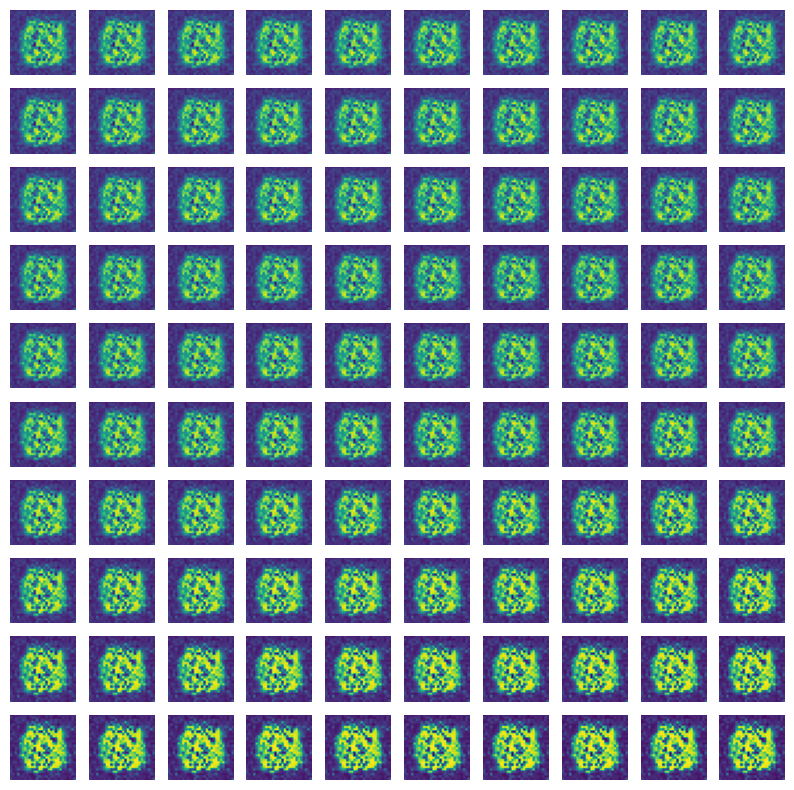

In [24]:

# Display the interpolations
plt.figure(figsize=(10, 10))
for i in range(10):
    for j in range(10):
        index = i * 10 + j
        plt.subplot(10, 10, index + 1)
        plt.imshow(interpolations[index])
        plt.axis('off')
plt.savefig('interpolations.png')
plt.show()

that was pretty bad so let's use a convolutional Layers instead!

In a 2D convolution, we slide a small matrix called a kernel over an input image, computing a dot product between the kernel and the corresponding input pixels at each location. This operation produces a new feature map that summarizes the presence and distribution of certain patterns in the input image.

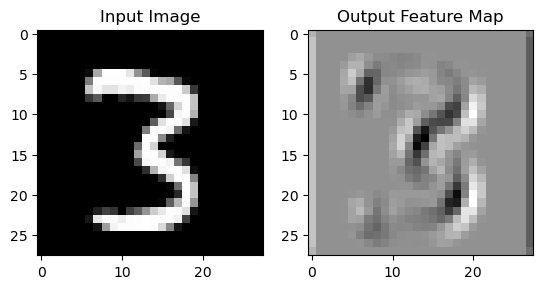

In [33]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt

# Load the MNIST dataset
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)

# Define a simple 2D convolutional neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv(x)
        return x

# Instantiate the neural network
net = Net()

# Define a 3x3 kernel that detects vertical edges
kernel = torch.tensor([[1.0, 0.0, -1.0],
                       [1.0, 0.0, -1.0],
                       [1.0, 0.0, -1.0]])

# Apply the 2D convolution to an image from the MNIST dataset
for i, (image, label) in enumerate(train_loader):
    if i == 0:
        # Apply the convolution to the first image in the dataset
        output = net(image)
        output = nn.functional.conv2d(output, kernel.view(1, 1, 3, 3), bias=None, stride=1, padding=1)

        # Plot the input image and the output feature map
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(image[0, 0], cmap='gray')
        ax[0].set_title('Input Image')
        ax[1].imshow(output[0, 0].detach().numpy(), cmap='gray')
        ax[1].set_title('Output Feature Map')
        plt.show()

        break

As we can see, the output feature map highlights the vertical edges in the input image by producing high values where there are vertical transitions between dark and light pixels. What any 2D convolutional layer ths effectively does it it tries to learn the features that describe an image best. If certian features are present then we can better reconstruc the image!

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.utils import save_image
from torch.utils.data import DataLoader
import numpy as np
import torchvision

# Define the encoder network
class Encoder(nn.Module):
    def __init__(self, latent_size):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        self.fc_mu = nn.Linear(128 * 4 * 4, latent_size)
        self.fc_logvar = nn.Linear(128 * 4 * 4, latent_size)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 128 * 4 * 4)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

# Define the decoder network
class Decoder(nn.Module):
    def __init__(self, latent_size):
        super(Decoder, self).__init__()
        self.fc = nn.Linear(latent_size, 128 * 7 * 7)
        self.conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)

    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, 128, 7, 7)
        x = F.relu(self.conv1(x))
        x_hat = torch.sigmoid(self.conv2(x))
        x_hat = x_hat[:, :, :28, :28]
        return x_hat


# Define the VAE
class VAE(nn.Module):
    def __init__(self, latent_size):
        super(VAE, self).__init__()
        self.encoder = Encoder(latent_size)
        self.decoder = Decoder(latent_size)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

def loss_function(x, x_hat, mu, logvar):
    bce_loss = F.binary_cross_entropy(x_hat, x, reduction='sum')
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())/1000
    loss = bce_loss + kld_loss
    return loss

# Load the MNIST dataset
batch_size = 64
train_dataset = MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [35]:
# Define the size of the latent space
latent_size = 20

# Initialize the VAE model
model = VAE(latent_size)

# Set the device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the device
model.to(device)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [36]:
# Define the number of epochs to train for
num_epochs = 40
# Train the model
for epoch in range(num_epochs):
    # Set the model to train mode
    model.train()

    # Loop over the training data
    for batch_idx, (x, _) in enumerate(train_loader):
        # Move the data to the device
        x = x.to(device)

        # Zero the optimizer gradients
        optimizer.zero_grad()

        # Compute the reconstruction loss and the KL divergence
        x_hat, mu, logvar = model(x)
        loss = loss_function(x, x_hat, mu, logvar)

        # Backpropagate the loss and update the model parameters
        loss.backward()
        optimizer.step()

        # Print the loss at the end of each batch
        if batch_idx % 100 == 0:
            print('Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}'.format(
                epoch+1, num_epochs, batch_idx+1, len(train_loader), loss.item()))

    # Save a sample image at the end of each epoch
    with torch.no_grad():
        z = torch.randn(16, latent_size).to(device)
        x_hat = model.decoder(z)
        x_hat = x_hat.view(-1, 1, 28, 28)
        save_image(x_hat, 'sample_image_{}.png'.format(epoch+1))


Epoch [1/40], Batch [1/938], Loss: 34277.4492
Epoch [1/40], Batch [101/938], Loss: 12327.7520
Epoch [1/40], Batch [201/938], Loss: 9453.9873
Epoch [1/40], Batch [301/938], Loss: 7856.6279
Epoch [1/40], Batch [401/938], Loss: 7713.2437
Epoch [1/40], Batch [501/938], Loss: 7319.3633
Epoch [1/40], Batch [601/938], Loss: 7034.7349
Epoch [1/40], Batch [701/938], Loss: 7216.1182
Epoch [1/40], Batch [801/938], Loss: 7089.6240
Epoch [1/40], Batch [901/938], Loss: 6882.1396
Epoch [2/40], Batch [1/938], Loss: 6779.9668
Epoch [2/40], Batch [101/938], Loss: 6878.1592
Epoch [2/40], Batch [201/938], Loss: 6996.2393
Epoch [2/40], Batch [301/938], Loss: 6881.7344
Epoch [2/40], Batch [401/938], Loss: 7061.6729
Epoch [2/40], Batch [501/938], Loss: 6756.8877
Epoch [2/40], Batch [601/938], Loss: 7179.9814
Epoch [2/40], Batch [701/938], Loss: 6634.9902
Epoch [2/40], Batch [801/938], Loss: 6937.9814
Epoch [2/40], Batch [901/938], Loss: 6579.3340
Epoch [3/40], Batch [1/938], Loss: 6579.0527
Epoch [3/40], Bat

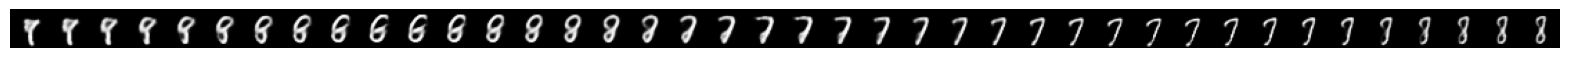

In [37]:
import numpy as np
import torch
import matplotlib.pyplot as plt 

# Generate a set of random points in the latent space
num_points = 5
latent_size = 20
z = torch.randn(num_points, latent_size).to(device)

# Generate images for each point in the latent space
with torch.no_grad():
    x_hat = model.decoder(z)

# Reshape the output tensor to a 4D tensor of images
x_hat = x_hat.view(-1, 1, 28, 28)

# Define the number of interpolation steps
num_steps = 10

# Perform linear interpolation between the images
interpolations = []
for i in range(num_points - 1):
    for j in range(num_steps):
        # Compute the interpolation weight
        alpha = j / (num_steps - 1)

        # Compute the interpolated latent vector
        z_interp = (1 - alpha) * z[i] + alpha * z[i+1]

        # Decode the interpolated latent vector to an image
        with torch.no_grad():
            x_interp = model.decoder(z_interp.unsqueeze(0))
        x_interp = x_interp.view(-1, 1, 28, 28)

        # Append the interpolated image to the list
        interpolations.append(x_interp)

# Concatenate the interpolated images into a single tensor
interpolations = torch.cat(interpolations, dim=0)

# Rescale the pixel values to [0, 1]
interpolations = (interpolations - interpolations.min()) / (interpolations.max() - interpolations.min())

# Convert the tensor to a numpy array
interpolations = interpolations.cpu().numpy()

# Reshape the array to a grid of images
interpolations = np.transpose(interpolations, (0, 2, 3, 1))
interpolations = np.concatenate(interpolations, axis=1)

# Display the grid of interpolated images
plt.figure(figsize=(20, 8))
plt.imshow(interpolations, cmap='gray')
plt.axis('off')
plt.show()


# Ok can we use this for chemistry?

Yes! in my one paper I used a pretty similar network to predict images froma bsorption spectra and spectra from images. Neural networks work on a lot of more things!

yeah, we can use a lstm network to predict time series data like battery degradation for example! More on this Thursday!
Maybe we can even learn what elements are and draw our own periodic table?

In [ ]:
#because I felt fancy here is a download with a progress bar:

import os
import requests
from tqdm import tqdm

import h5py
import numpy as np
from scipy.interpolate import interp1d

# Set the filename to save the file as
filename = 'AutoBassPapercells.hdf5'

# Load the HDF5 file containing the cycling data
f = h5py.File('AutoBassPapercells.hdf5', 'r')

: 